# **INTRODUCING**
Here's a Linear Regression Model Implementation <br> for my future fan made Machine Learning Framework<br> **LUNA-R** <br>
___
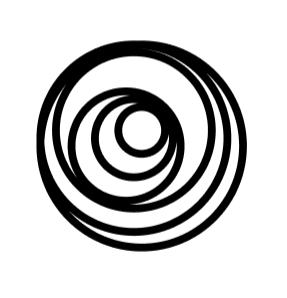

In [322]:
import numpy as np
import matplotlib.pyplot as plt

In [323]:
# Linear Regression class Implementation:

"""
Multivariable Linear Regression model basis:
"""

'\nMultivariable Linear Regression model basis:\n'

In [324]:
type(np.array([1, 2, 3])) is np.ndarray

True

In [325]:
"""

 __      __     _      _____ _____       _______ ____  _____
 \ \    / /\   | |    |_   _|  __ \   /\|__   __/ __ \|  __ \
  \ \  / /  \  | |      | | | |  | | /  \  | | | |  | | |__) |
   \ \/ / /\ \ | |      | | | |  | |/ /\ \ | | | |  | |  _  /
    \  / ____ \| |____ _| |_| |__| / ____ \| | | |__| | | \ \
     \/_/    \_\______|_____|_____/_/    \_\_|  \____/|_|  \_\


                          VALIDATOR V 0.01
                              --------

          InputValidation class Purpose is to validate
          inputs of particular model. It raises error messages
          with help on fixing this bug.

          Conditions checked:
          1. Data Shapes
          2. Data Types
          3. Appropriate argument values

"""
class InputValidation:
  def __init__(self):
    pass

  def linear_regression_valid(self, X, y, epochs, lr, verbose, loss):
    try:
      assert(X.shape[0] == y.shape[0])
    except:
      raise ValueError("X shape doesn't correspond to y shape  (number of samples doesn't match number of labels)")

    assert(loss.lower() in self.supported_loss)

    assert np.all(X) == True and np. all(y) == True
    assert(type(epochs) == int)
    assert(type(lr) == float)

    # if everything is fine
    return 0

In [326]:
"""
  __  __  ____  _____ _____ ______ _____ ______ _____   _____
 |  \/  |/ __ \|  __ \_   _|  ____|_   _|  ____|  __ \ / ____|
 | \  / | |  | | |  | || | | |__    | | | |__  | |__) | (___
 | |\/| | |  | | |  | || | |  __|   | | |  __| |  _  / \___ \
 | |  | | |__| | |__| || |_| |     _| |_| |____| | \ \ ____) |
 |_|  |_|\____/|_____/_____|_|    |_____|______|_|  \_\_____/


                   MODIFIERS V 0.01
                       --------

              Modifiers are used for fitting
              process customization and control.

              V 0.01 Modifier List:
              1. EarlyStopping
"""


class Modifiers:
  def __init__(self):
    pass

  def early_stopping(loss, history, patience, temp_patience, delta):
    if loss <= min(history) and min(history) - loss >= delta:
      return 1

    elif temp_patience >= patience:
      return 0

    else:
      temp_patience += 1
    return 2

In [327]:

"""

  _      ____   _____ _____ ______  _____
 | |    / __ \ / ____/ ____|  ____|/ ____|
 | |   | |  | | (___| (___ | |__  | (___
 | |   | |  | |\___ \\___ \|  __|  \___ \
 | |___| |__| |____) |___) | |____ ____) |
 |______\____/|_____/_____/|______|_____/


             LOSS MODULE V 0.01
                 --------

    Losses class Purpose is to set
    different cost functions for
    different models. Via these
    cost functions model will be optimized
    with optimization function.

    V 0.01 Cost Function List:
    1. Mean Squared Error (mse)
    2. Mean Absolute Error (mae)

"""


class Losses:
  def __init__(self):
    pass

  def mean_squared_error(self, y_true, y_pred):
    loss = 0

    for i in range(len(y_true)):
      loss += (y_true[i] - y_pred[i]) ** 2

    loss = loss / len(y_true)

    return loss


  def mean_absolute_error(self, y_true, y_pred):
    loss = 0

    for i in range(len(y_true)):
      loss += abs(y_true[i] - y_pred[i])

    loss = loss / len(y_true)

    return loss

In [328]:

"""
  _      _                         _____                              _
 | |    (_)                       |  __ \                            (_)
 | |     _ _ __   ___  __ _ _ __  | |__) |___  __ _ _ __ ___  ___ ___ _  ___  _ __
 | |    | | '_ \ / _ \/ _` | '__| |  _  // _ \/ _` | '__/ _ \/ __/ __| |/ _ \| '_ \
 | |____| | | | |  __/ (_| | |    | | \ \  __/ (_| | | |  __/\__ \__ \ | (_) | | | |
 |______|_|_| |_|\___|\__,_|_|    |_|  \_\___|\__, |_|  \___||___/___/_|\___/|_| |_|
                                               __/ |
                                              |___/


                          Linear Regression Model V 0.01
                                    --------

                          Linear Regression is not only simple
                          but really efficient and widely spread.

                          This class implements Linear Regression
                          with Gradient Descent optimization.


                                    -------

                                 M E T H O D S:

                                    __init__

                              Basic Initialization

                              - loss history init
                              - modifiers list init
                              - supported losses init


                                      fit


                              - Fitting process algorithm
                                    -------
                                      fit
                                   I N P U T:

                                - array-like data
                                - number of epochs
                                - learning_rate (0.01 by default)
                                - verbose level
                                  (0 - no output;
                                   1 - Only number of epochs;
                                   2 and more - Full info with loss)
                                - loss function (mse by default)

                                    -------
                                      fit
                                 O U T P U T:

                                 - weights
                                 - bias

                          V 0.01 Cost Function List:
                          1. Mean Squared Error (mse)
                          2. Mean Absolute Error (mae)


"""



class LinearRegression:
  def __init__(self):

    # useful variables initialization:

    self.loss_history = [30]
    self.supported_modifiers = {'early_stopping_modifier': Modifiers.early_stopping}
    self.supported_loss = {'mse': Losses.mean_squared_error,
                           'mae': Losses.mean_absolute_error}


  def fit(self, X, y, epochs=0, lr=0.01, verbose=2, loss_function='mse', modifier=None, delta=0, patience=0):
    # catch errors:
    InputValidation.linear_regression_valid(self, X, y, epochs, lr, verbose, loss_function)

    temp_patience = 0

    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    for epoch in range(epochs):
      dw = np.zeros(n_features)
      db = 0

      for sample in range(n_samples):
        dw += (np.dot(self.weights, X[sample]) - y[sample] + self.bias) * X[sample]
        db += np.dot(self.weights, X[sample]) - y[sample] + self.bias

      self.weights -= 1 / n_samples * dw * lr
      self.bias -= 1 / n_samples * db * lr

      ### stats for nerds🤓

      loss = self.supported_loss[loss_function](self, self.predict(X), y)
      if verbose >= 2:
        print(f'On Epoch: {epoch} | Loss is: {loss}')
      elif verbose == 1:
        print(f'Epoch: {epoch}/{epochs}')

      # modifiers

      if modifier:
        if modifier in self.supported_modifiers:
          result = self.supported_modifiers[modifier](loss, self.loss_history, patience, temp_patience, delta)
          print(result)
          if result == 1:
            temp_patience = 0

          elif result == 2:
            temp_patience += 1

          else:
            return self.weights, self.bias

      self.loss_history.append(loss)

    return self.weights, self.bias


  def predict(self, X):
    preds = []

    for x_i in X:
      preds.append(np.dot(self.weights, x_i) + self.bias)

    return preds


**LUNAR** LINEAR REGRESSION <br>
___

Test #1: Single Variable Linear Regression:

In [329]:
X = np.array([1, 2, 3])
X = np.expand_dims(X, 1)
y = np.array([2, 4, 6])

In [330]:
np.all(y) == True

True

In [331]:
linear_model = LinearRegression()
linear_model.fit(X, y, epochs=200, lr=0.1, verbose=52, loss_function='mae')

On Epoch: 0 | Loss is: 1.7333333333333336
On Epoch: 1 | Loss is: 0.7244444444444449
On Epoch: 2 | Loss is: 0.3990617283950617
On Epoch: 3 | Loss is: 0.27539588477366284
On Epoch: 4 | Loss is: 0.22699670781893003
On Epoch: 5 | Loss is: 0.22660421947873774
On Epoch: 6 | Loss is: 0.22492082981252862
On Epoch: 7 | Loss is: 0.22268066616064633
On Epoch: 8 | Loss is: 0.2202104563794136
On Epoch: 9 | Loss is: 0.21765549436647516
On Epoch: 10 | Loss is: 0.21508027445167274
On Epoch: 11 | Loss is: 0.21251330919281486
On Epoch: 12 | Loss is: 0.2099670890842987
On Epoch: 13 | Loss is: 0.20744697164265644
On Epoch: 14 | Loss is: 0.2049551401573829
On Epoch: 15 | Loss is: 0.20249236670281304
On Epoch: 16 | Loss is: 0.20005879727145034
On Epoch: 17 | Loss is: 0.19765430140650744
On Epoch: 18 | Loss is: 0.19527862788322312
On Epoch: 19 | Loss is: 0.19293147401375613
On Epoch: 20 | Loss is: 0.19061251648443248
On Epoch: 21 | Loss is: 0.18832142506163363
On Epoch: 22 | Loss is: 0.18605786866852458
On E

(array([1.97112149]), 0.06564763881618481)

In [332]:
y_pred = linear_model.predict(X)
y_pred

[2.0367691298271686, 4.007890620838153, 5.979012111849137]

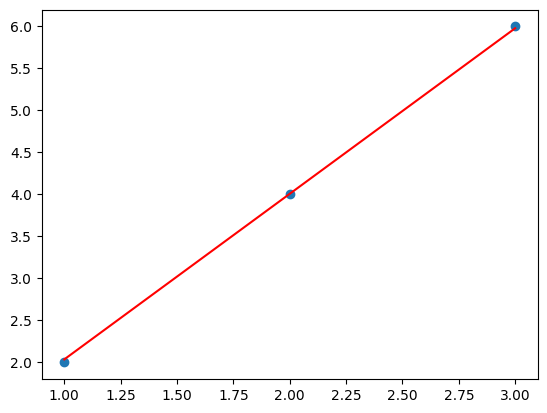

In [333]:
plt.scatter(X, y)
plt.plot(X, y_pred, c='red');

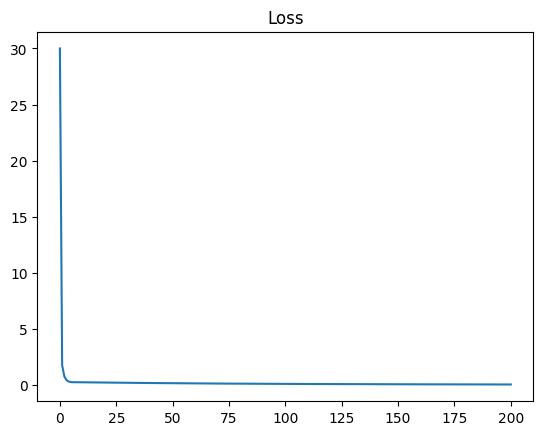

In [334]:
plt.title('Loss')
plt.plot(linear_model.loss_history);

**LUNAR** Linear Regression <br>
___
Test #2 Multiple Variable Linear Regression:

In [335]:
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([3, 7, 11])

In [336]:
X.shape

(3, 2)

In [337]:
linear_model = LinearRegression()
linear_model.fit(X, y, epochs=1500, verbose=2, modifier='early_stopping_modifier', patience=7, delta=0.0001)

On Epoch: 0 | Loss is: 28.35562962962963
1
On Epoch: 1 | Loss is: 13.481166794403299
1
On Epoch: 2 | Loss is: 6.414950896224368
1
On Epoch: 3 | Loss is: 3.058067728757532
1
On Epoch: 4 | Loss is: 1.4633151099424868
1
On Epoch: 5 | Loss is: 0.7056684722803993
1
On Epoch: 6 | Loss is: 0.34569196271531194
1
On Epoch: 7 | Loss is: 0.17463018551999784
1
On Epoch: 8 | Loss is: 0.09331322710993549
1
On Epoch: 9 | Loss is: 0.05463010440731166
1
On Epoch: 10 | Loss is: 0.03620059422084857
1
On Epoch: 11 | Loss is: 0.027392899206866893
1
On Epoch: 12 | Loss is: 0.023156348951201167
1
On Epoch: 13 | Loss is: 0.021091605077835113
1
On Epoch: 14 | Loss is: 0.02005885290304189
1
On Epoch: 15 | Loss is: 0.019516618470885316
1
On Epoch: 16 | Loss is: 0.01920767149102097
1
On Epoch: 17 | Loss is: 0.019009812534089236
1
On Epoch: 18 | Loss is: 0.018864989016087377
1
On Epoch: 19 | Loss is: 0.018745621522122762
1
On Epoch: 20 | Loss is: 0.018638607019785532
1
On Epoch: 21 | Loss is: 0.01853771953494159
1

(array([0.85755245, 1.06778331]), 0.2102308600539743)

In [338]:
linear_model.predict(X)

[3.203349943984716, 7.054021482523055, 10.904693021061394]

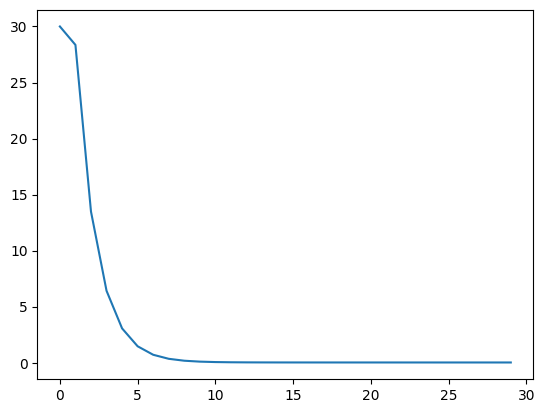

In [339]:
plt.plot(linear_model.loss_history);

YO!!!! <br>
That works nearly perfect!

In [340]:
### Place for future code

Details on LUNA-R. <br>
LUNA-R is gonna be an open-source fan-made Machine Learning Framework. <br>

- Fully written on python
- Open Source
- Made For Educational Purposes
___

LUNA-R is not gonna be something large and COOL.<br>
Main Idea of project is to implement Machine Learning algorithms from scratch.